Date: Jan 21 2025

Exploratory data analysis of the dataset for Project 1

In [ ]:
import os, sys
os.path.dirname(sys.executable)

In [24]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Load the data
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [11]:
df.shape

(126, 7)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [73]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Percentiles
Consider X1:

25% means 25% of values are less than 4.0 (first quartile)

50% means 50% of values are less than 5.0 (median/second quartile)

75% means 75% of values are less than 5.0 (third quartile)

So we can get a sense of the range of values. We can visualize these using a histogram.

In [25]:
df['X1'].nunique()

4

In [21]:
#Check if the dataset is balanced based on output classes
df['Y'].mean() # class1 - 69, class2 - 57 (so, it is fairly balanced)

0.5476190476190477

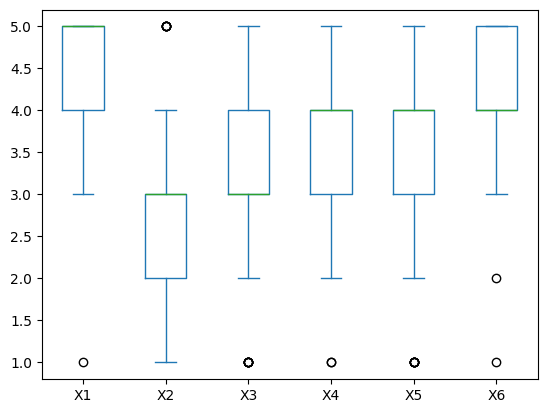

In [17]:
# Boxplots
df_excluded = df.drop(columns=['Y'])
df_excluded.plot(kind='box')
plt.show()

In [40]:
df_excluded['X2'].unique()

array([3, 2, 4, 5, 1], dtype=int64)

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>],
       [<Axes: title={'center': 'X5'}>, <Axes: title={'center': 'X6'}>]],
      dtype=object)

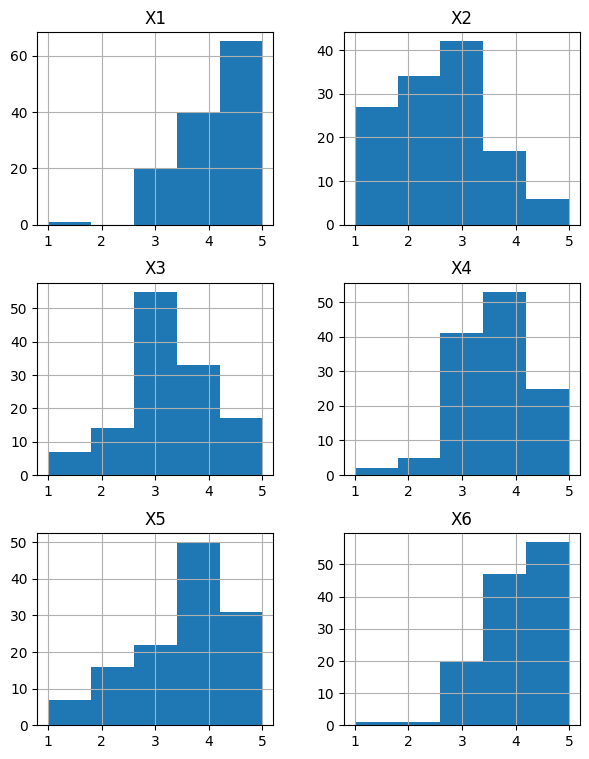

In [65]:
#df_excluded.hist(bins=[1,2,3,4,5], figsize=(7,9))
df_excluded.hist(bins=5, figsize=(7,9))

The above histogram when plotted using `bins=[1,2,3,4,5]` is not be accurate (or not displaying what we want) because the values are discrete. Histogram tries to put values into bins or ranges of values. So there are only 4 bins.
When `bins=5`, the result is showing the frequencies. However, for a better frequency plot, a bar plot is better.

In [50]:
df_excluded

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


   X1  X2  X3  X4  X5  X6
1   1  27   7   2   7   1
2   0  34  14   5  16   1
3  20  42  55  41  22  20
4  40  17  33  53  50  47
5  65   6  17  25  31  57


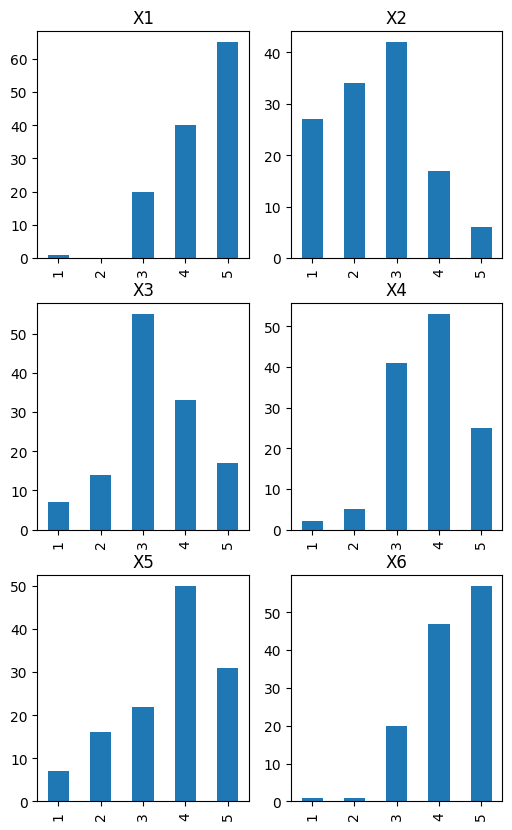

In [67]:
# Plot frequency bar plot for independent variables

# Values to count
values_to_count = [1, 2, 3, 4, 5]

# Frequency count for each column
frequency = df_excluded.apply(lambda col: col.value_counts().reindex(values_to_count, fill_value=0))

print(frequency)

fig, axs = plt.subplots(3, 2, figsize=(6,10))
axs = axs.ravel()
idx = 0
for col in frequency.columns:
    frequency[col].plot(kind='bar', title=col, ax=axs[idx])
    idx+=1

plt.show()

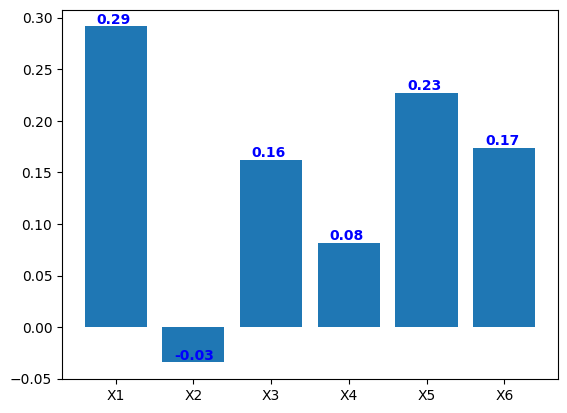

In [35]:
correlations = []
for col in df_excluded.columns:
    corr = df['Y'].corr(df_excluded[col], method='spearman')
    correlations.append(corr)

fig, ax = plt.subplots()
ax.bar([1,2,3,4,5,6], correlations, tick_label=['X1','X2','X3','X4','X5','X6'])

for i, v in enumerate(correlations):
    ax.text(i + 0.75,v + 0.003, '{:0.2f}'.format(v), 
            color = 'blue', fontweight = 'bold')
plt.show()

In [38]:
## Chi-squared statistical test of association
## if p < 0.05, we can say that there is a statistically significant relationship between the two variables.
## A higher degree of freedom indicates more flexibility in the data.
## Chi-Squared Statistic measures the strength of the association. Larger values indicate a stronger relationship.

import pandas as pd
from scipy.stats import chi2_contingency

# Loop through each feature
for feature in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['Y']) # For each value that X1 can take, frequency of 0 and 1 samples
    
    # Perform the Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results

    print(f'Feature: {feature}')
    print(f'Chi-Squared Statistic: {chi2:.2f}')
    print(f'p-value: {p:.4f}')
    print(f'Degrees of Freedom: {dof}')
    print('-' * 30)


Feature: X1
Chi-Squared Statistic: 11.98
p-value: 0.0074
Degrees of Freedom: 3
------------------------------
Feature: X2
Chi-Squared Statistic: 2.38
p-value: 0.6671
Degrees of Freedom: 4
------------------------------
Feature: X3
Chi-Squared Statistic: 4.34
p-value: 0.3619
Degrees of Freedom: 4
------------------------------
Feature: X4
Chi-Squared Statistic: 4.65
p-value: 0.3253
Degrees of Freedom: 4
------------------------------
Feature: X5
Chi-Squared Statistic: 6.81
p-value: 0.1464
Degrees of Freedom: 4
------------------------------
Feature: X6
Chi-Squared Statistic: 8.14
p-value: 0.0866
Degrees of Freedom: 4
------------------------------


In [11]:
print(df['Y'].value_counts())
print(df['Y'].unique())
print(df['Y'].dtype)

Y
1    69
0    57
Name: count, dtype: int64
[0 1]
int64


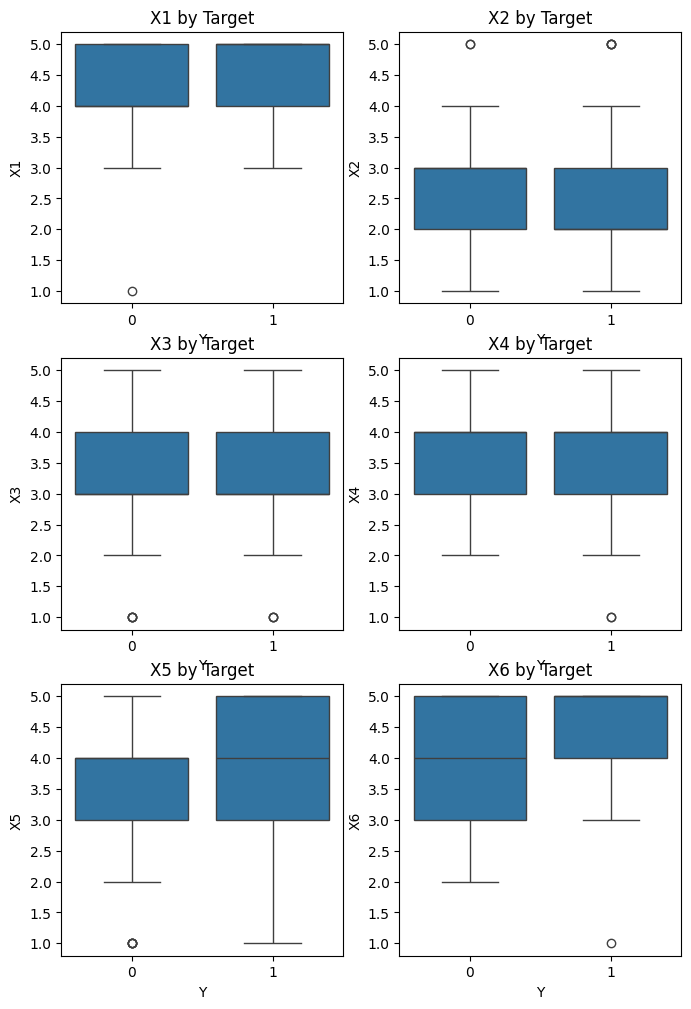

In [15]:
## Blox plots grouped by the target class
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(8,12))
axs = axs.ravel()
idx = 0

# Loop through all features
for idx, feature in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6']):
    #plt.figure(figsize=(8, 5))
    sns.boxplot(x='Y', y=feature, data=df, ax=axs[idx])
    axs[idx].set_title(f'{feature} by Target')

plt.show()


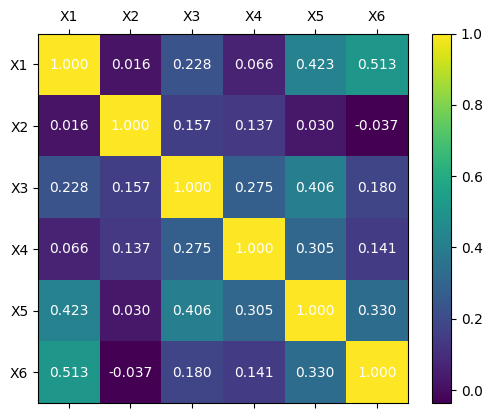

In [97]:
## Correlation between each feature
## Since data is ordinal, we are using spearman rank correlation

corr = df_excluded.corr(method='spearman')
#corr.style.background_gradient(cmap='coolwarm')
fig, ax = plt.subplots()
img = ax.matshow(corr)
# Customize x-axis tick labels
plt.xticks([0, 1, 2, 3, 4, 5], ["X1", "X2", "X3", "X4", "X5", "X6"])
# Customize y-axis tick labels
plt.yticks([0, 1, 2, 3, 4, 5], ["X1", "X2", "X3", "X4", "X5", "X6"])
fig.colorbar(img)

for i, col in enumerate(df_excluded.columns):
    for j, row in enumerate(df_excluded.columns):
        text = ax.text(j, i, '{:0.3f}'.format(corr[col][row]), ha="center", va="center", color="w")

plt.show()

In [96]:
corr

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.015683,0.228081,0.065851,0.422786,0.512855
X2,0.015683,1.000000,0.156817,0.136659,0.030070,-0.037147
X3,0.228081,0.156817,1.000000,0.275266,0.406356,0.179754
X4,0.065851,0.136659,0.275266,1.000000,0.305012,0.141381
X5,0.422786,0.030070,0.406356,0.305012,1.000000,0.330066
X6,0.512855,-0.037147,0.179754,0.141381,0.330066,1.000000


In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
Y = df['Y']

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 6) (26, 6) (100,) (26,)


0.46153846153846156
[0.46153846 0.4        0.52       0.6        0.72      ]
0.5403076923076924


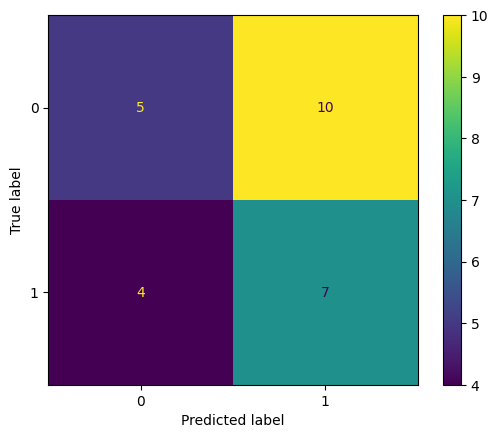

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

# entire dataset
y_pred = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(logisticRegr, X, Y, cv=kfold)

# Print the scores
print(scores)

# Calculate the mean score
print(scores.mean())

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [20]:
logisticRegr.coef_

array([[ 0.815221  , -0.21932735, -0.05685305, -0.07188641,  0.05076571,
         0.11867249]])

In [26]:
## Logistic Regression with each independent variable 
for col in df_excluded.columns:
    
    X_sel = df[col]
    #print(X_sel)

    x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, Y, test_size=0.2, random_state=42)
    # Print the shapes of the resulting sets
    #print(x_train_sel.shape, x_test_sel.shape, y_train_sel.shape, y_test_sel.shape)
    
    logisticRegr.fit(x_train, y_train)

    # entire dataset
    predictions = logisticRegr.predict(x_test)

    # Use score method to get accuracy of model
    score = logisticRegr.score(x_test, y_test)
    print(score)


0.46153846153846156
0.46153846153846156
0.46153846153846156
0.46153846153846156
0.46153846153846156
0.46153846153846156


In [31]:
# Search the hyperparameter space for logistic regression
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'], #'elasticnet',    # Used to specify the norm used in the penalization.
    'C' : [0.1, 1, 10, 100],#np.logspace(-4, 4, 20),                      # Inverse of regularization strength; must be a positive float.
    'solver' : ['liblinear'], #['lbfgs','newton-cg','liblinear','sag','saga'] # Algorithm to use in the optimization problem.
    'max_iter' : [100, 1000,2500, 5000]                # Maximum number of iterations taken for the solvers to converge.
    }
] 

logisticRegr = LogisticRegression()
# Create a GridSearchCV object
grid_search = GridSearchCV(logisticRegr, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_estimator.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters: ", best_params)
print("Accuracy: ", accuracy)

Best parameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy:  0.4230769230769231


d:\Installations\Python\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Installations\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Installations\Python\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\Installations\Python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Installations\Python\Lib\site-packages\skle

In [11]:
from sklearn import svm
from sklearn import metrics


#Create a svm Classifier
clf = svm.SVC(kernel='poly') # polynomial Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset

y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, Y, cv=kfold)

# Print the scores
print(scores)

# Calculate the mean score
print(scores.mean())

Accuracy: 0.7307692307692307
[0.73076923 0.44       0.68       0.6        0.44      ]
0.5781538461538462


In [13]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # polynomial Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, Y, cv=kfold)

# Print the scores
print(scores)

# Calculate the mean score
print(scores.mean())

Accuracy: 0.5
[0.46153846 0.44       0.56       0.56       0.64      ]
0.5323076923076924


In [18]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # polynomial Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46153846153846156


In [19]:
#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # polynomial Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4230769230769231


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, Y, cv=kfold)

# Print the scores
print(scores)

# Calculate the mean score
print(scores.mean())

Accuracy: 0.6538461538461539
[0.65384615 0.44       0.64       0.56       0.6       ]
0.5787692307692308


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, Y, cv=kfold)

# Print the scores
print(scores)

# Calculate the mean score
print(scores.mean())

Accuracy: 0.6153846153846154
[0.57692308 0.44       0.56       0.44       0.52      ]
0.5073846153846154


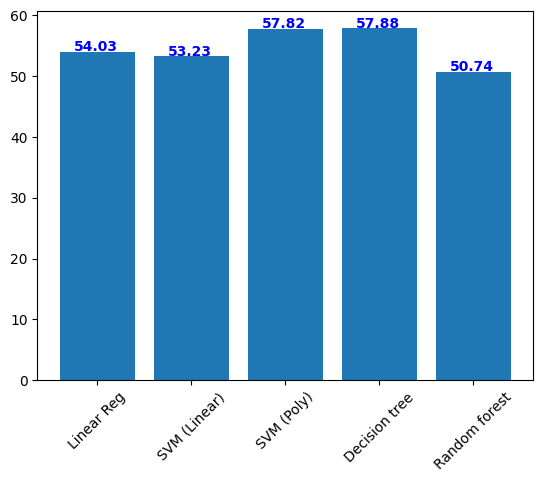

In [22]:
## Plotting accuracies
acc = [54.03, 53.23, 57.82, 57.88, 50.74]
fig, ax = plt.subplots()

ax.bar([1, 2, 3, 4, 5], acc, tick_label=['Linear Reg', 'SVM (Linear)', 'SVM (Poly)', 'Decision tree', 'Random forest'])
plt.xticks(rotation=45) 
for i, v in enumerate(acc):
    ax.text(i + 0.75,v + 0.09, '{:0.2f}'.format(v), 
            color = 'blue', fontweight = 'bold')
plt.show()

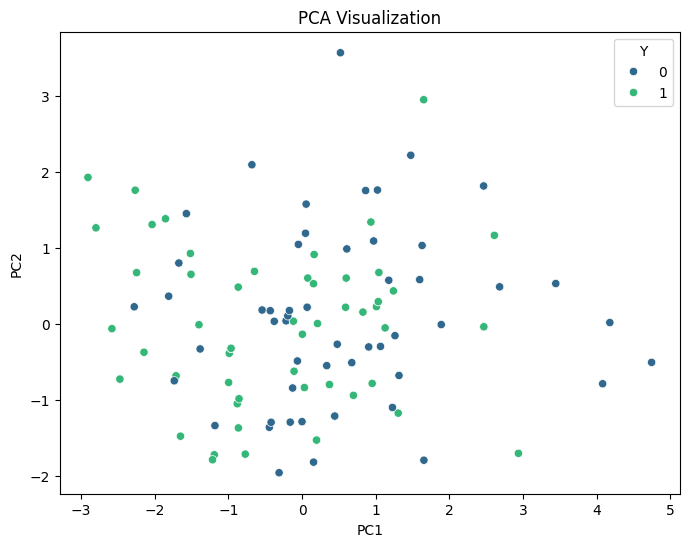

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Y'] = df['Y']

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Y', palette='viridis', data=pca_df)
plt.title('PCA Visualization')
plt.show()
